<a href="https://colab.research.google.com/github/CarmenSC/Ejemplo/blob/main/facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Facebook's Prophet Library

## Importing the Data

👇 Go to [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [25]:
data = pd.read_csv('/content/multiTimeline (1).csv', header=1)

## Displaying the Data

👇Visualize the data by displaying the first few rows of the dataframe

In [26]:
data.head(5)

,Month,data science: (United States)
0,2004-01,12
1,2004-02,9
2,2004-03,7
3,2004-04,9
4,2004-05,6


## Data Preprocessing

Facebook's Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements. Remember, the DataFrame should have both a `ds` and a `y` column.

In [27]:
data.columns = ['ds', 'y']

In [28]:
data['ds']= pd.to_datetime(data['ds'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      239 non-null    datetime64[ns]
 1   y       239 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


## Plotting the Data

👇 Plot the data

<Axes: xlabel='ds'>

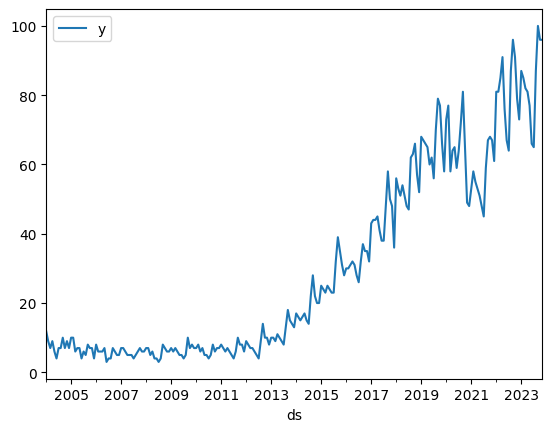

In [30]:
data.plot(x='ds',y='y')

## Fitting the Data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split.

In [32]:
#from sklearn.model_selection import TimeSeriesSplit
#tss = TimeSeriesSplit(n_splits = 3)

In [33]:
#X = data.drop(labels=['y'], axis=1)
#y = data['y']

In [34]:
#for train_index, test_index in tss.split(X):
 #   X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
  #  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [59]:
X_train = data.iloc[:170,]
X_test = data.iloc[170:,]

In [60]:
prophet_model = Prophet()
prophet_model.fit(X_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/4vvomk_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/erj3ws16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93747', 'data', 'file=/tmp/tmpqx3_4ps9/4vvomk_o.json', 'init=/tmp/tmpqx3_4ps9/erj3ws16.json', 'output', 'file=/tmp/tmpqx3_4ps9/prophet_modelo3ys1hna/prophet_model-20231109151703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Make Future Predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder DataFrame that will eventually hold the predictions. Once you create the DataFrame, try to predict 2 years in the future.

You can create the predictions DataFrame using `make_future_dataframe()`

In [57]:
# Make predictions for the next 2 years
future = prophet_model.make_future_dataframe(periods=5, freq='Y')
forecast = prophet_model.predict(future)

## Plotting the Forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

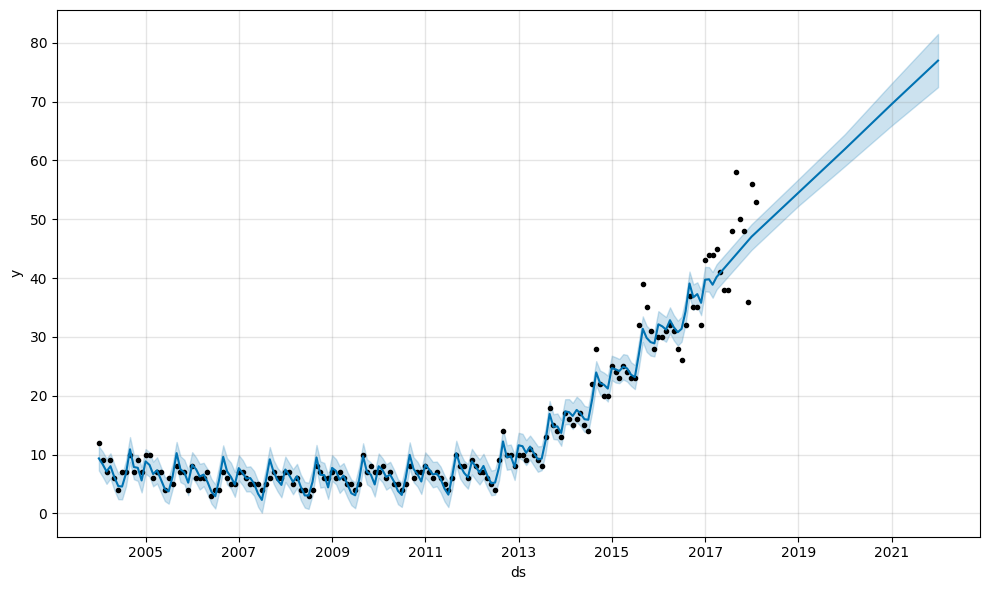

In [61]:
prophet_model.plot(forecast);

👉 From 2004 to 2018 we can see the train data, as well as the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' Trend and Seasonality

👇 Plot the trend and yearly seasonality of the Time Series. This can be done using the `plot_components()` function from Facebook's Prophet Library

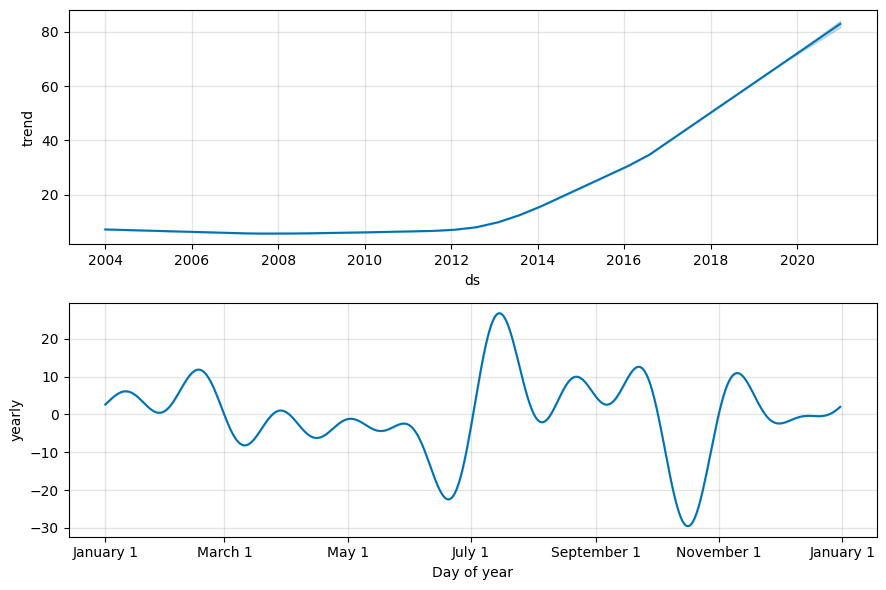

In [52]:
prophet_model.plot_components(predicted_values);

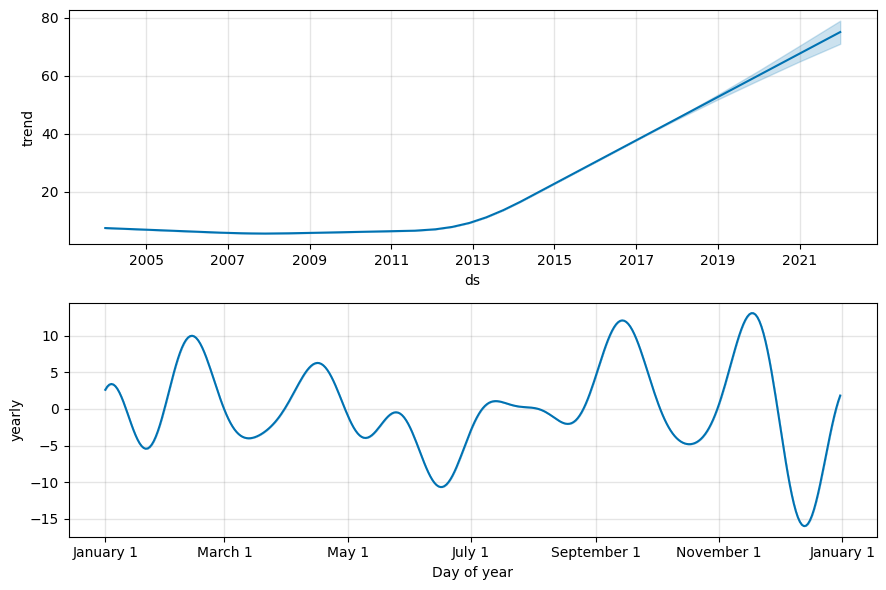

In [64]:
fig2 = prophet_model.plot_components(forecast)

In [62]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
160,2017-12-31,47.031083,44.784870,49.148071
161,2018-12-31,54.465866,52.226121,56.755818
162,2019-12-31,61.895817,59.000938,64.438271
163,2020-12-31,69.522292,65.887881,73.059104
164,2021-12-31,76.961946,72.446453,81.492784


In [65]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet_model, forecast)

In [67]:
plot_components_plotly(prophet_model, forecast)



## Evaluating the Model with Cross-Validation!

👇 Using `cross_validation()` and `performance_metrics()` from [prophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 year
- shifting each fold by 180 days

<img src="https://wagon-public-datasets.s3-eu-west-1.amazonaws.com/05-Machine-Learning/09-Time-Series/prophet_train_test_split.png" width=850>

In [75]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [88]:
initial = '5 Y'  # Train sets of size 5 years
period = '1 Y'    # Horizon validation sizes of 1 year
horizon = '180 days'  # Shifting each fold by 180 days


In [89]:
df_cv = cross_validation(prophet_model, initial=initial, period=period, horizon=horizon)


/usr/local/lib/python3.10/dist-packages/prophet/diagnostics.py:143: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.

/usr/local/lib/python3.10/dist-packages/prophet/diagnostics.py:148: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.

INFO:prophet:Making 9 forecasts with cutoffs between 2009-08-05 01:26:24 and 2017-08-05 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/3erszcp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/fh3epexh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14933', 'data', 'file=/tmp/tmpqx3_4ps9/3erszcp9.json', 'init=/tmp/tmpqx3_4ps9/fh3epexh.json', 'output', 'file=/tmp/tmpqx3_4ps9/prophet_modelkzz77lis/prophet_model-20231109153858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:38:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/qmgzq0el.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqx3_4ps9/ushfjlym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [ ]:
df_cv

In [90]:
df_p = performance_metrics(df_cv)


In [ ]:
df_p

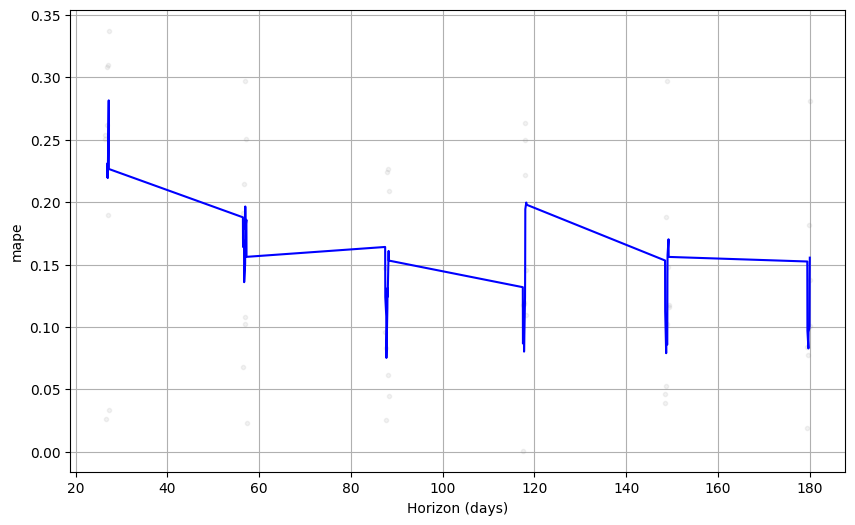

In [83]:
fig = plot_cross_validation_metric(df_cv, metric='mape')


⚠️ Don't forget to push the challenge to GitHub once you're done 😄